# John Conways Game of Life + Genetic Drift

## Base Game Parameters
1.   Any “live” cell with fewer than two “live” neighbors dies.
2.   Any live cell with two or three live neighbors lives on to the next generation
3. Any live cell with more than three live neighbors dies
4. Any dead cell with exactly three live neighbors becomes a live cell

#Initializing cells on grid with random 1 or 0 value and assign a color to 1 cells
#COMPLETED DUE APRIL 1st 2024


##random_grid(height, width, p_alive)
  **Purpose:** We want to a randomly generated grid of 1s (alive)  and 0s (dead) based on a given height/width. This generates our first generation randomly. Since generating randomly, need to provide frequency in which cells are "alive".
  
example output under hood:

    00000100
    00000101
    01000101
    01100000
    00000100


**Edit Version 2**:

Made two versions of this code, one where parameters are predefined.

 is better because the user can fully customize the enviroment size, the number of allels in the population, how dense the population is, and the colors used to represent each allele.

I solved this functionally to have one function define what colors the user picks (input_colors()) and nested that in the the random grid generator funciton (random_grid())as the  color_pallete argument .

**Edit Version 3**

Change from a list to a dictionary in "input_color_and_density() fucntion" and added calc for realtive freq/density. The dictionary allows us to map input colors to input relative frequencies. This is pivitol for later in the code accessing the keys to update the relative frequencies, add new colors and frequencies as mutations and hybrids happen, and

Goal output under hood:

  --> a big difference is the 3 channels of output representing the RGB colors

    (0,0,0)(0,0,0)(255,0,0)(0,0,0)
    (0,0,0)(255,0,0)(0,0,0)(255,0,0)
    (0,0,255)(0,0,0)(255,0,0)(0,0,255)



> Geek for Geek's random_grid(N)
    # setting up the values for the grid
    ON = 255   #<--- this is white cell
    OFF = 0    #<--- this is black cell
    vals = [ON, OFF]
  
    def randomGrid(N):
  
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
_____________________________________________________________________
> Colorful Conway GOL Github's random_grid

    def random_grid(height, width, density=.3, padding=0):
	"""
	Gives a random 2D grid of 1s and 0s.

	Parameters:
	height (int): How many rows the grid will have
	width (int): How many columns the grid will have
	density (float): The probability any given cell will be a 1
	padding (int): If a padding value is specified, cells within the padding distance of an edge will always be 0

	Returns:
	2D list
	"""

	if not padding:
		return [[1 if random()<density else 0 for x in range(width)] for y in range(height)]
	else:
		return [[(1 if random()<density else 0) if (not (x < padding or x >= width - padding)) and (not (y < padding or y >= height - padding)) else 0 for x in range(width)] for y in range(height)]
______________________________________________________________________
>Custom one for us taking the best of both worlds

This one is the best of both examples because utilizes the numpy module to generate random cells for us, but give the flixibilty to specify probabilty of alive cells and assign a set value of colors that we can attribute a fitness score to. I dont think we need padding so dropped that.

    #specify specific colors were gonna use unmixed
    color_palette = [
    (255, 0, 0),  # Red
    (0, 255, 0),  # Green
    (0, 0, 255),  # Blue
    (255, 255, 0),  # Yellow
    # Add more colors as needed
    ]
    #function to assign alive/dead + alive ones colors
    def random_colored_grid(height, width, density=0.3):
      #Create an empty grid with size = 3 channels for RGB colors
      grid = np.zeros((height, width, 3), dtype=int)
      for i in range(height):
          for j in range(width):
              if np.random.rand() < density:
                # Assign a random color for alive cells
                grid[i, j] = np.random.randint(0, 256, size=3) #this is not exactly what we want, it assigns any color mixed, but want to start out with a pure color, so going to change this and add a color palette to pull from

      return grid

In [ ]:
#Referenced this a lot: https://numpy.org/doc/stable/reference/random/index.html
#VERSION 1 DONE or NOT DONE? DONE initializing a grid with colored cells.

import numpy as np
import matplotlib.pyplot as plt
#defining the starting values/colors for the grid. This will later be defined by "fitness", and also each iteration will be dynamic.


color_palette = [
    (255, 0, 0),  # Red
    (0, 0, 255),  # Blue
    (255, 255, 0),  # Yellow
]
def random_grid(height, width, density, alleles):
  # Initialize an empty grid. shape=(height, width, and 3) each cell in grid has 3 components for RGB value
  grid = np.zeros((height, width, 3), dtype=int)                                #np.zeros((shape)) Return a new array of given shape and type, filled with zeros. https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros
    # Randomly assign colors to cells based on density
  for i in range(height):
    for j in range(width):
      if np.random.rand() < density:                                            #generates a random # between 1 and 0 < probabilty of being alive (example 0.1) If True = alive cell
      # Assign a random color for alive cells
        grid[i, j] = color_palette[np.random.randint(len(color_palette))]       #from color palette, choose a random values
      # Dead cells are still [0,0,0]
  return grid

grid = random_grid(int(input("Enter enviroment height:")), int(input("Enter enviroment width:")), float(input("Enter organism's density:")))
################################################################### USED TO SEE WHAT THE INITAL PLOT LOOKS LIKE #######################
plt.imshow(grid)
plt.show()

#This isnt super great...
# Might be easier to make it more open eneded like have them pick their color however, because the # of alleles is limtied to the colors in the palletle and assigned fitness. User has to know colors in pallete and thier associted fitness score

In [ ]:
#VERSION 2 DONE or NOT DONE? DONE More flexible and user defined parameters for initializing a grid with colored cells.
import numpy as np
import matplotlib.pyplot as plt

def input_colors(num_colors):
  # Generates the color pallete to be used in random_grid function. Gives the user freedom to pick color of alleles on RBG scale [0-255,0-255,0-255]
  color_palette = []
  for i in range(num_colors):
    print("Enter color of allele {i+1} in RGB format (r,g,b where each value is between 0-255): ")
    rgb_values = input().split(',')  # Expecting input format to be 'r,g,b'
    color = tuple(map(int, rgb_values))  # Convert input to a tuple of integers
    color_palette.append(color)
  return color_palette

def random_grid(height, width, density, color_palette):
  # Call on function that allows the user to input specific colors
  color_palette = input_colors(num_colors)
  # Initialize an empty grid.
  grid = np.zeros((height, width, 3), dtype=int) #this makes a grid of zeros of specified hxw
  # Randomly assign colors to cells based on density
  for i in range(height):
    for j in range(width):
      if np.random.rand() < density: #Generate a number between 0-1. If denisty > number genrated, that is a "alive" or 1 cell.
      # Assign a random color for "alive" or 1 cells
        grid[i, j] = color_palette[np.random.randint(len(color_palette))]
  return grid

# User input for the grid dimensions, density, and number of colors
height = int(input("Enter environment height: "))
width = int(input("Enter environment width: "))
density = float(input("Enter organism's density: "))
num_colors = int(input("Enter the number of colors (alleles): "))

# We could have user define fitness scores for each color here
#color_fitness_scores = {color: index + 1 for index, color in enumerate(color_palette)}

# Define grid variable as one with the user-defined parameters
user_grid = random_grid(height, width, density, color_palette)

##################EXAMPLE OF PLOT LOOKS LIKE-- WILL BE INPUTED INTO RULES OF GAME TO GENERATE ITERATIONS######################################
# Display the initial plot
plt.imshow(user_grid)
plt.show()

In [ ]:
#VERSION 3 DONE or NOT DONE? DONE Addeed relative frequency as a dictionary of alleles which will go into calulating fitness
import math
from random import random
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.colors as clrs


def input_colors_and_densities(alleles):
  color_density_map = {}  # Use a dictionary to map colors to densities, useful later for fitness calculations
  for i in range(alleles):
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ")
    rgb_values = rgb_values.split(',')
    color = tuple(map(int, rgb_values))

    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density
  print(color_density_map) #check to see what it looks like
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)
  colors = list(color_density_map.keys())
  densities = list(color_density_map.values())
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:  # Decide if the cell is alive or a "1"
        color_index = np.random.choice(len(colors), p=densities)
        grid[i, j] = colors[color_index]

  return grid


# User inputs for grid dimensions and overall population density
height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

# Input specific colors for alleles and their relative densities in population
alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

# Call random_grid to generate the grid with the user-defined parameters
user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()


#Fitness Fucntion + Color

#COMPLETED DUR APRIL 22nd



**Purpose:** This function will dictate what the childrens cells color will be depending on how "fit" the parent cells are.

HUE and AVERGAE HUE from Colorful GOL Git Hub  https://github.com/adam-zheleznyak/colorful-life/blob/master/examples.py

Notes: This is not too helpful tbh. Our designs diverge a bit here as well. The ket differences are in how we fillout the next step gen, how we access the color+fitness info, and add in mutations more dynamically. Im not to sure about creating a while new class either. The average equation is close, but since our data is in (RGB) format, we need to rethink how we caluclate the new color in the average colro function. Lets take what we can from it.

      class Hue:
	"""This is a class to represent a color's hue as a float mod 1. Two Hue objects can be added together to get a new Hue object."""

	def __init__(self, value):
		self.value = float(value % 1)

	def __bool__(self):
		return True

	def __float__(self):
		return float(self.value)

	def __repr__(self):
		return repr(self.value)

	def __add__(self, other):
		return Hue(self.value + other.value)

    def average_hue(list_of_hues):
	"""
	Gets the average hue from a list of hues.

	Parameters:
	list_of_hues (list of Hue objects)

	Returns:
	Hue
	"""

	x = 0.0
	y = 0.0
	# Take all the hues as points on a unit circle and average their coordinates to find the average
	for hue in list_of_hues:
		x += math.cos(hue.value*2*math.pi)
		y += math.sin(hue.value*2*math.pi)
	x /= len(list_of_hues)
	y /= len(list_of_hues)
	return Hue(math.atan2(y,x)/(2*math.pi))

### Version 1 Psudocode
    def color_update(gen_x_grid): #I need this to be called in a place so EVERY new grid is recounted for their colors and frequency

    take old freqencies from initialization step and and put inside a stack
    
    take color out of stack and compare to every cell. Is that color in the new grid?
    yes -->  return color to new list that will be called upon again in next iteration
    
    no--> pop color out of stack and dont append to new list


    Problems Enocuntered: This is very inefficent and since comparing using old list, when a new color is encountered it wont be recgonized and added to list.
  

    def color_fitness() #needs to run when making rules to detrmine new cell color

    --> need to count how many cells are this color in the grid

    XXX This gets hairy, need to find a way to build this in above too.
    
    Going back above to change data strucutre and make a dictionary/ access key of color:density

In [ ]:
#VERSION 1

#Need a fucntion that updates the color_density_map function from the input in te initilzation stage. This is to keep track of new colors that emerge and their relative frequency.
#This needs to be ran when we do the iterative steps.
def color_density_map_update(grid)
  color_denisity_update = {} #update = making new dictionary from old one and adding wats needed/new
  total_alive = 0
  for row in grid
    for cell in row
      if np.any(cell > 0)
        cell_color = tuple(cell)
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        tota_alive += 1
  color_density_map_update = {color: count/ total_alive for color, count in color_denisity_update.items() if total_alive > 0}  #dictionary comprehension to extract color and frequency from above.
  return color_density_map_update

#Need  a fucntion that calulates the weighted average of RBG vales based on frequency in pop.
#This needs to be ran when we make the new grid for each generation
def fitness_function(live_neighbors, color_density_map):
  # Start out with blank weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0])
  total_density = 0.0 #alive cells to track relative freq later

  # Calculate weighted sums for each color component
  for color in live_neighbors:
    n_color = tuple(color) #was having trouble, array was immutable so needed to turn to tuple.
    if n_color in color_density_map:
      density = color_density_map[n_color]
      weighted_sum += np.array(color) * density
      total_density += density

  if total_density > 0:
    new_color = (weighted_sum / total_density).astype(int)
  else:
    new_color = (0,0,0) #dead cell

  return tuple(new_color)

In [ ]:
#VERSION 2

#used to update the color_denisty_map based on current generation, will impliment later
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born"
  total_alive = 0                                                               #number of cells alive for realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive if have rgb info
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count

 # After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension

  color_density_map_update = {color: count/ total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color.
#Hybrids have bad realtive density though, so equals to bad fitness. In above color_denisty_update maybe have it be a very small chance that one cell if lucky and hybrid artifically has a high fitness "high-density" to equal a advantagous allele/mutation

def fitness_function(live_neighbors, color_density_map):
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0]) #cumulative RGB values of neighbor livecells
  total_density = 0.0 #used to calc weighted average later

  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                   #iterate over color/rbg values. this is implimented in the gen_step function, because have to be detrmined by rules as well.
    n_color = tuple(color)                                                       #have to turn to tuple to extract and use dictionary keys. *rememeber tuples immutable so can be used as keys
    if n_color in color_density_map:                                             #does color exist in dictionary
      density = color_density_map[n_color]                                       #if so get the density/relative frequency
      weighted_sum += np.array(color) * density                                  #multiply the color by the density giving it more weight, and add to weighted sum. turn back to array
      total_density += density                                                   #add density to total

  if total_density > 0:
    new_color = (weighted_sum / total_density).astype(int) #new color is the weighted sum over the total, make sure it is a whole number for rbg vale
  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return tuple(new_color)                                                       #return color for gen step


In [ ]:
#VERSION 3 ADDED MUTATIONS TO BE MORE DEFINED (good/bad) and their effect on color
#used to update the color_denisty_map based on current generation, will impliment later
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born"
  total_alive = 0                                                               #number of cells alive for realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive if have rgb info
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count

 # After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension

  color_density_map_update = {color: count/ total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color.
#Hybrids have bad realtive density though, so equals to bad fitness. In above color_denisty_update maybe have it be a very small chance that one cell if lucky and hybrid artifically has a high fitness "high-density" to equal a advantagous allele/mutation

def fitness_function(live_neighbors, color_density_map, mutation_rate=0.01, beneficial_mutation_multiplier = 1.25, detrimental_mutation_multiplier = 0.8): #picked multiplier and mutation rate arbutrarily
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0]) #cumulative RGB values of neighbor livecells
  total_density = 0.0 #used to calc weighted average later

  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                   #iterate over color/rbg values. this is implimented in the gen_step function, because have to be detrmined by rules as well.
    n_color = tuple(color)                                                       #have to turn to tuple to extract and use dictionary keys. *rememeber tuples immutable so can be used as keys
    if n_color in color_density_map:                                             #does color exist in dictionary
      density = color_density_map[n_color]                                       #if so get the density/relative frequency
      weighted_sum += np.array(color) * density                                  #multiply the color by the density giving it more weight, and add to weighted sum. turn back to array
      total_density += density                                                   #add density to total

  if total_density > 0:
    w_average_color = (weighted_sum / total_density).astype(int)                #new color is the weighted sum over the total, make sure it is a whole number for rbg vale

    #mutation section, want mutation to artifically change "frequecy" or "fitness" (either positive or negative) and also change color
    #inspired by github, account for mutation, the RBG value and "density" or relative fitness will be mutilplied by beneficial or detriment factor to change color slighlty and either raise or lower fitness/frequency artifically
    if np.random.rand() < mutation_rate:
      if np.random.rand() < 0.10:                                                  #10% chance of being good mutation, 90% chance of being bad (idk if that biologocally accurate)
        mutation = np.clip(w_average_color * beneficial_mutation_multiplier, 0, 255).astype(int)
        density_adjustment_factor = beneficial_mutation_multiplier
      else:
        mutation = np.clip(w_average_color * detrimental_mutation_multiplier, 0, 255).astype(int)
        density_adjustment_factor = detrimental_mutation_multiplier
      new_color = tuple(mutation)

      total_density *= density_adjustment_factor

    else:
      new_color = tuple(w_average_color)

  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return new_color                                                              #return color for gen step


# Setting up Base Game Parameters and calling Fitness f(x) for Color Determination
#COMPLETE DUE APRIL 15, 2024


  ## grid_update( genx-1_grid, color_update, rule=[[3],[2,3]])
  **Purpose:** This function is "updates" the initalized random grid based off rules for the next iteration or generation". The def takes the arguments of the previous generations grid, rules to update the color(fitness), and the rules for conways game.

Geek for Geek's Bulk of Game Rules (Took some bits from this code as well)

NOTES: I like the way the grid here is constructed more so than the Colorful GOL.

    def update(frameNum, img, grid, N):
      
        # copy grid since we require 8 neighbors  
        # for calculation and we go line by line  
        newGrid = grid.copy()
        for i in range(N):
            for j in range(N):
      
                # compute 8-neighbor sum
                # using toroidal boundary conditions - x and y wrap around  
                # so that the simulation takes place on a toroidal surface.
                total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                            grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                            grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                            grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
      
                # apply Conway's rules
                if grid[i, j]  == ON:
                    if (total < 2) or (total > 3):
                        newGrid[i, j] = OFF
                else:
                    if total == 3:
                        newGrid[i, j] = ON
      
        # update data
        img.set_data(newGrid)
        grid[:] = newGrid[:]
        return img,
  

Colorful GOL Git Hub (Mostly editted this peice of code to work for our purposes)  https://github.com/adam-zheleznyak/colorful-life/blob/master/examples.py Why does he have the rules 3 different times?

    def colorful_life_step(colored_grid, color_variation=0.05, hard_boundary=True, rule=[[3],[2,3]]):
      """
      Runs a step for The Colorful Game of Life.
      
      The Colorful Game of Life has the same rules as Conway's Game of Life, except that all living cells also have a color assigned to them. When a new cell is born, it will take on the average color of its parents. Color variation can be added so that newly born cells can deviate slightly in color. Living cells will keep their color fixed until they die.
      
      Parameters:
      colored_grid (2D list of Hue objects): The grid that should be stepped through
      color_variation (float): A newly born cell will deviate from its color randomly up or down, with this amount being the maximum possible deviation.
      hard_boundary (bool): Setting this to False will identify opposite edges so that cells touching the boundary will communicate with cells on the other side of the grid.
      rule (2D list of integers): The first set of elements is how many neighbors leads to a birth, and the second is how many neighbors lead to a cell surviving.
      
      Returns:
      2D list of Hue objects
      """
      
      height = len(colored_grid)
      width = len(colored_grid[0])
      next_grid = []
      if not hard_boundary:
        if width >= 3 and height >= 3:
          for j in range(height):
            row = []
            for i in range(width):
              live_neighbors = [colored_grid[(j+a) % height][(i+b) % width] for a in (-1,0,1) for b in (-1,0,1) if ((a is not 0 or b is not 0) and colored_grid[(j+a) % height][(i+b) % width])]
              neighbor_count = len(live_neighbors)
              if colored_grid[j][i]:
                if neighbor_count in rule[1]:
                  row.append(colored_grid[j][i])
                else:
                  row.append(None)
              else:
                if neighbor_count in rule[0]:
                  hue = average_hue(live_neighbors)
                  row.append(Hue(hue.value+uniform(-color_variation, color_variation)))
                else:
                  row.append(None)
            next_grid.append(row)
          return next_grid
        else:
          # Need to tweak things so cells aren't double-counted
          for j in range(height):
            row = []
            for i in range(width):
              if height >= 3:
                # width is short
                live_neighbors = [colored_grid[(j+a) % height][(i+b) % width] for a in (-1,0,1) for b in range(width) if ((a is not 0 or b is not 0) and colored_grid[(j+a) % height][(i+b) % width])]
              elif width >= 3:
                # height is short
                live_neighbors = [colored_grid[(j+a) % height][(i+b) % width] for a in range(height) for b in (-1,0,1) if ((a is not 0 or b is not 0) and colored_grid[(j+a) % height][(i+b) % width])]
              else:
                # width and height are short
                live_neighbors = [colored_grid[(j+a) % height][(i+b) % width] for a in range(height) for b in range(width) if ((a is not 0 or b is not 0) and colored_grid[(j+a) % height][(i+b) % width])]
                
                
              neighbor_count = len(live_neighbors)
              if colored_grid[j][i]:
                if neighbor_count in rule[1]:
                  row.append(colored_grid[j][i])
                else:
                  row.append(None)
              else:
                if neighbor_count in rule[0]:
                  hue = average_hue(live_neighbors)
                  row.append(Hue(hue.value+uniform(-color_variation, color_variation)))
                else:
                  row.append(None)
            next_grid.append(row)
          return next_grid
      else:
        for j in range(height):
          row = []
          for i in range(width):
            live_neighbors = [colored_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if ((a is not 0 or b is not 0) and ((j+a) % height is j+a) and ((i+b) % width is i+b) and colored_grid[j+a][i+b])]
            neighbor_count = len(live_neighbors)
            if colored_grid[j][i]:
              if neighbor_count in rule[1]:
                row.append(colored_grid[j][i])
              else:
                row.append(None)
            else:
              if neighbor_count in rule[0]:
                hue = average_hue(live_neighbors)
                row.append(Hue(hue.value+uniform(-color_variation, color_variation)))
              else:
                row.append(None)
          next_grid.append(row)
        return next_grid


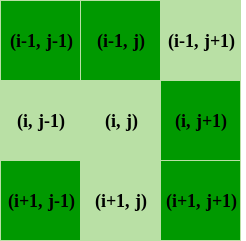

In [ ]:
#Steps into the next generation, color changes based on fitness, and cells changed based of conways rules
#Im not sure why Colorful GOL had the rules 3 times, but going to just roll with the base.
def generation_step(user_grid, color_denisty_map, color_variation=0.05, survival_rule=[2, 3], birth_rule=[3],):
  height , width = user_grid.shape[:2] #based on first user_grid find # elements in row/column
  next_grid = np.zeros((height, width, 3), dtype=np.uint8) #initilaize next grid as black and will update with rules as follows, dtype=np.uint8 is used for uint8: 8-bit unsigned integer (0 to 255). Most often this is used for arrays representing images, with the 3 color channels having small integer values (0 to 255)

  if width >= 3 and height >= 3: #Will error out if the enviroment or the size of the grid is less than 3x3 (for ease of Conway's Rules)
    #iterate through each cell
    for j in range(height):
      for i in range(width):

        #here "a" represents the current cell (0), to above(-1), and below(1) the cell being iterated on. "b" represents the current, left(-1), and right(+1) of cell being iterated on.
        #check all 8 surrounding cells, I dont want torodial because I want boundries, so got rid of it from Github version. If organism leaves boudries, it is "dead". NOTE! cells on edges have differnt odds of survival then.

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]
                                                #exclude current cell, check if neighboring cells is within the boundries, check if neighboring cell is alive, any RGB value is non-zero
        neighbor_count = len(live_neighbors)  #from LC above, count how many cells around iterated cell were alive or "1"


        if np.any(user_grid[j][i]>0): #If current cell is alive
          if neighbor_count in survival_rule: #If has enough alive neighbors (i.e 2 or 3 in rule[1] = [2,3])
            next_grid[j,i] =user_grid[j,i] #cell from user grid survives and makes it to next gen
          else:
            next_grid[j,i] = (0,0,0) #append a dead cell


        else:
          if neighbor_count in birth_rule: #if current cell is dead check to see if it has enough live neighbors to become alive (ie exactly 3 neigbors)
            new_color = fitness_function(live_neigbors, color_density_map)#assign a new color based on fitness
            next_grid[j, i] = new_color

  return next_grid

# Setting up the Iterations and saving GIF/Animation

#COMPLETE DUE APRIL 30th

In [ ]:
#RIPPED AND EDITED FORM COLORFUL GOL

	def animate(user_grid):
		plt.cla()
		ax.imshow(grid_to_array(user_grid), cmap=plt.cm.hsv, norm=clrs.Normalize(vmin=0,vmax=1), interpolation='nearest')

	anim = anm.FuncAnimation(fig, animate, frames=frames, interval=interval)

	if show:
		plt.show()

	return anim

def save_as_gif(user_grid, number_of_frames, filename, color_density_map, color_variation=0.05, survival_rule=[2, 3], birth_rule=[3], cell_size=0.2, interval=300):
    anim = generation_step_limited(user_grid, number_of_frames, color_density_map, color_variation, survival_rule, birth_rule, interval, cell_size, show=False)
    anim.save(filename, writer='imagemagick', fps=5)
    plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, survival_rule=[2, 3], birth_rule=[3], interval=300, cell_size=1.0):
    """
    Simulate the grid evolution for a specified number of generations and save the animation as a GIF.

    Parameters:
    - initial_grid: The starting state of the grid.
    - color_density_map: Dictionary mapping colors (alleles) to their initial relative densities.
    - num_generations: Number of generations to simulate.
    - filename: Filename for the output GIF.
    - survival_rule, birth_rule: Rules determining cell survival and birth.
    - interval: Time interval between frames in the animation.
    - cell_size: Size of each cell in the animation.
    """

    # Prepare the plot
    fig, ax = plt.subplots(figsize=(initial_grid.shape[1]*cell_size, initial_grid.shape[0]*cell_size))
    ax.axis('off')

    grids = [initial_grid]  # List to hold each generation's grid state

    # Simulate each generation
    for _ in range(num_generations):
        next_grid = generation_step(grids[-1], color_density_map, survival_rule=survival_rule, birth_rule=birth_rule)
        color_density_map = color_density_map_update(next_grid)  # Update allele frequencies
        grids.append(next_grid)

    # Animation function
    def update(frame):
        ax.clear()
        ax.axis('off')
        ax.imshow(grids[frame])

    # Create and save the animation
    ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
    ani.save(filename, writer='imagemagick', fps=10)
    plt.close(fig)

#Composite Code VERSION 1

Enter the environment's height: 50
Enter the environment's width: 50
Enter the organisms population density (value between 0 and 1): 0.1
Enter the number of alleles in population: 2
Choose a color for allele 1 in RGB format (r,g,b where each value is between 0-255): 255,0,255
Enter the relative frequency of allele 1 (value between 0 and 1): 0.5
Choose a color for allele 2 in RGB format (r,g,b where each value is between 0-255): 255,255,0
Enter the relative frequency of allele 2 (value between 0 and 1): 0.5
{(255, 0, 255): 0.5, (255, 255, 0): 0.5}


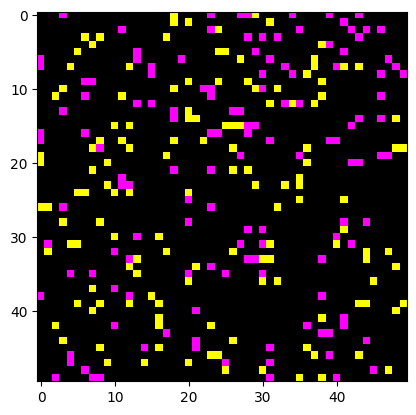

In [ ]:
import math
from random import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

####################################### INITIALIZATION ###########################################################################################################

def input_colors_and_densities(alleles):
  color_density_map = {}                                                        # Use a dictionary to map colors to densities, useful later for fitness calculations and when updating across gens
  for i in range(alleles):
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ")
    rgb_values = rgb_values.split(',')                                          # Expecting user to input format as 'r,g,b'
    color = tuple(map(int, rgb_values))                                         # Convert input to a tuple of integers using HOF and map to


    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density                                          #Map color to density
  print(color_density_map)                                                      #check to see what it looks like
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)                           #learned .uint8 is used spec. for RGB values! Initialize a "dead" grid, each cell with 3 RGB # assocaited with it
  colors = list(color_density_map.keys())                                       #list all the colors from input
  densities = list(color_density_map.values())                                  #list the allele freq from input
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:                                    # Decide if the cell is alive or a "1" by generating a number between 0-1. If # < overall_denisty or the organisms population density, its alive! Life...uh, finds a way.
        color_index = np.random.choice(len(colors), p=densities)                #assign it a random color from input colors and realtive allele freq.
        grid[i, j] = colors[color_index]

  return grid


# All the user inputs for grid dimensions and overall population density
height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

# All the input for specific colors to alleles and their relative densities in population
alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

# Call random_grid to generate the grid with the user-defined parameters
user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()                                                                      #generate starting plot so we have something nice to look at while GIF is loading

############################################### FITNESS CALC #########################################################################################################

#used to update the color_denisty_map based on current generation, will impliment later
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born"
  total_alive = 0                                                               #number of cells alive for realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive if have rgb info
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count

 # After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension

  color_density_map_update = {color: count/ total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color.
#Hybrids have bad realtive density though, so equals to bad fitness. In above color_denisty_update maybe have it be a very small chance that one cell if lucky and hybrid artifically has a high fitness "high-density" to equal a advantagous allele/mutation

def fitness_function(live_neighbors, color_density_map):
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0]) #cumulative RGB values of neighbor livecells
  total_density = 0.0 #used to calc weighted average later

  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                   #iterate over color/rbg values. this is implimented in the gen_step function, because have to be detrmined by rules as well.
    n_color = tuple(color)                                                       #have to turn to tuple to extract and use dictionary keys. *rememeber tuples immutable so can be used as keys
    if n_color in color_density_map:                                             #does color exist in dictionary
      density = color_density_map[n_color]                                       #if so get the density/relative frequency
      weighted_sum += np.array(color) * density                                  #multiply the color by the density giving it more weight, and add to weighted sum. turn back to array
      total_density += density                                                   #add density to total

  if total_density > 0:
    new_color = (weighted_sum / total_density).astype(int) #new color is the weighted sum over the total, make sure it is a whole number for rbg vale
  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return tuple(new_color)                                                       #return color for gen step

################################################## GENERATION STEPS ############################################################################

def generation_step(user_grid, color_denisty_map, color_variation=0.05, survival_rule=[2, 3], birth_rule=[3],):
  height , width = user_grid.shape[:2]                                          #based on first user_grid find # elements in row/column
  next_grid = np.zeros((height, width, 3), dtype=np.uint8)                      #initilaize next grid as dead like in intilization and will update grid with cells based on the rules as follows

  if width >= 3 and height >= 3:                                                #Will error out if the enviroment or the size of the grid is less than 3x3 (for ease of Conway's Rules)
    #iterate through each cell
    for j in range(height):
      for i in range(width):

        #ripped from GitHub version, here "a" represents the current cell (0), to above(-1), and below(1) the cell being iterated on. "b" represents the current, left(-1), and right(+1) of cell being iterated on.
        #NOTE: IDK WHY THE GIHUB VERSION HAD THE RULES IN THE LOOP 3 SEPERATE TIMES (TO PREVENT DOUBLE COUNTING MAYBE?), I GOT RID OF IT BECAUSE a.) MY RAM and b.) I DONT THINK NEEDED
        #check all 8 surrounding cells, I dont want torodial because I want the boundries, so got rid of it from Github version as well. If organism leaves boudries, it is "dead". NOTE! cells on edges have differnt odds of survival then, but organimsm not in there habitat will die and edge of habitat have greater odds of dying, so well justify it like that hehe.

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]
                                                #conditionals: exclude current cell, check if neighboring cells is within the boundries, check if neighboring cell is alive, any RGB value is non-zero or alive/has color

        neighbor_count = len(live_neighbors)                                    #from LC above, count how many cells around iterated cell were alive or have RGB values


        if np.any(user_grid[j][i]>0):                                           #If current cell is alive
          if neighbor_count in survival_rule:                                   # and If has enough alive neighbors (i.e 2 or 3)
            next_grid[j,i] =user_grid[j,i]                                      #cell from user grid survives and makes it to next gen
          else:
            next_grid[j,i] = (0,0,0)                                            #append a dead cell, you lost the game of life, no one to mate with (underpopulation) or you were too ugly to mate with (overpopulated) *sad trumpet*


        else:
          if neighbor_count in birth_rule:                                      #if current cell is dead check to see if it has enough live neighbors to frankenstien alive (ie has exactly 3 neigbors)
            new_color = fitness_function(live_neighbors, color_density_map)     #assign a new color based on fitness function above (weighted mean, you get more of the better genes from one of your parents and a little of the bad genes from te other)
            next_grid[j, i] = new_color

  return next_grid

##################################################### LIMITED GEN + SAVE AS GIF ##############################################

#Ripped from github version but tweaked to include the color_density_map updates per iteration.

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, survival_rule=[2, 3], birth_rule=[3], interval=500, cell_size=1.0):
  fig, ax = plt.subplots(figsize=(initial_grid.shape[1]*cell_size, initial_grid.shape[0]*cell_size))
  ax.axis('off')
  grids = [initial_grid]                                                        # List to hold each generation's grid state

  for _ in range(num_generations):
    next_grid = generation_step(grids[-1], color_density_map, survival_rule=survival_rule, birth_rule=birth_rule)
    color_density_map = color_density_map_update(next_grid)                     # Update allele frequencies per gen
    grids.append(next_grid)

  # Animation function ripped from github
  def update(frame):
    ax.clear()
    ax.axis('off')
    ax.imshow(grids[frame])

  # Create and save the animation ripped from github
  ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
  ani.save(filename, writer='imagemagick', fps=5)
  plt.close(fig)

#CAN EDIT FPS AND INTERVAL TO TOGGLE GIF OUTPUT (SPEED AND NUMBER OF FRAMES PER MILLISECOND(?), TOGGLE ITERATIONS BELOW
initial_grid = user_grid
num_generations = int(input("How many generations of population?"))
simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, 'genedrifter.gif')

# Comopsite Code VERSION 2-

* ADDED MUTATIONS (multipier) INTO THE FITNESS() FUNCTION

In [ ]:
import math
from random import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

####################################### INITIALIZATION ###########################################################################################################

def input_colors_and_densities(alleles):
  color_density_map = {}                                                        # Use a dictionary to map colors to densities, useful later for fitness calculations and when updating across gens
  for i in range(alleles):
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ")
    rgb_values = rgb_values.split(',')                                          # Expecting user to input format as 'r,g,b'
    color = tuple(map(int, rgb_values))                                         # Convert input to a tuple of integers using HOF and map to


    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density                                          #Map color to density
  print(color_density_map)                                                      #check to see what it looks like
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)                           #learned .uint8 is used spec. for RGB values! Initialize a "dead" grid, each cell with 3 RGB # assocaited with it
  colors = list(color_density_map.keys())                                       #list all the colors from input
  densities = list(color_density_map.values())                                  #list the allele freq from input
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:                                    # Decide if the cell is alive or a "1" by generating a number between 0-1. If # < overall_denisty or the organisms population density, its alive! Life...uh, finds a way.
        color_index = np.random.choice(len(colors), p=densities)                #assign it a random color from input colors and realtive allele freq.
        grid[i, j] = colors[color_index]

  return grid


# All the user inputs for grid dimensions and overall population density
height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

# All the input for specific colors to alleles and their relative densities in population
alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

# Call random_grid to generate the grid with the user-defined parameters
user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()                                                                      #generate starting plot so we have something nice to look at while GIF is loading

############################################### FITNESS CALC #########################################################################################################

#used to update the color_denisty_map based on current generation, will impliment later
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born"
  total_alive = 0                                                               #number of cells alive for realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive if have rgb info
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count

 # After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension

  color_density_map_update = {color: count/ total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color.
#Hybrids have bad realtive density though, so equals to bad fitness. In above color_denisty_update maybe have it be a very small chance that one cell if lucky and hybrid artifically has a high fitness "high-density" to equal a advantagous allele/mutation

def fitness_function(live_neighbors, color_density_map, mutation_rate=0.01, beneficial_mutation_multiplier = 1.25, detrimental_mutation_multiplier = 0.8): #picked multiplier and mutation rate arbutrarily
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0]) #cumulative RGB values of neighbor livecells
  total_density = 0.0 #used to calc weighted average later

  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                   #iterate over color/rbg values. this is implimented in the gen_step function, because have to be detrmined by rules as well.
    n_color = tuple(color)                                                       #have to turn to tuple to extract and use dictionary keys. *rememeber tuples immutable so can be used as keys
    if n_color in color_density_map:                                             #does color exist in dictionary
      density = color_density_map[n_color]                                       #if so get the density/relative frequency
      weighted_sum += np.array(color) * density                                  #multiply the color by the density giving it more weight, and add to weighted sum. turn back to array
      total_density += density                                                   #add density to total

  if total_density > 0:
    w_average_color = (weighted_sum / total_density).astype(int)                #new color is the weighted sum over the total, make sure it is a whole number for rbg vale

    #mutation section, want mutation to artifically change "frequecy" or "fitness" (either positive or negative) and also change color
    #inspired by github, account for mutation, the RBG value and "density" or relative fitness will be mutilplied by beneficial or detriment factor to change color slighlty and either raise or lower fitness/frequency artifically
    if np.random.rand() < mutation_rate:
      if np.random.rand() < 0.10:                                                  #10% chance of being good mutation, 90% chance of being bad (idk if that biologocally accurate)
        mutation = np.clip(w_average_color * beneficial_mutation_multiplier, 0, 255).astype(int) #using np.clip so # isnt out of rgb "bounds" https://numpy.org/doc/stable/reference/generated/numpy.clip.html
        density_adjustment_factor = beneficial_mutation_boost
        density_adjustment_factor = beneficial_mutation_multiplier
      else:
        mutation = np.clip(w_average_color * detrimental_mutation_multiplier, 0, 255).astype(int)
        density_adjustment_factor = detrimental_mutation_multiplier
      new_color = tuple(mutation)

      total_density *= density_adjustment_factor

    else:
      new_color = tuple(w_average_color)

  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return new_color                                                              #return color for gen step

################################################## GENERATION STEPS ############################################################################

def generation_step(user_grid, color_denisty_map, survival_rule=[2, 3], birth_rule=[3],):
  height , width = user_grid.shape[:2]                                          #based on first user_grid find # elements in row/column
  next_grid = np.zeros((height, width, 3), dtype=np.uint8)                      #initilaize next grid as dead like in intilization and will update grid with cells based on the rules as follows

  if width >= 3 and height >= 3:                                                #Will error out if the enviroment or the size of the grid is less than 3x3 (for ease of Conway's Rules)
    #iterate through each cell
    for j in range(height):
      for i in range(width):

        #ripped from GitHub version, here "a" represents the current cell (0), to above(-1), and below(1) the cell being iterated on. "b" represents the current, left(-1), and right(+1) of cell being iterated on.
        #NOTE: IDK WHY THE GIHUB VERSION HAD THE RULES IN THE LOOP 3 SEPERATE TIMES (TO PREVENT DOUBLE COUNTING MAYBE?), I GOT RID OF IT BECAUSE a.) MY RAM and b.) I DONT THINK NEEDED
        #check all 8 surrounding cells, I dont want torodial because I want the boundries, so got rid of it from Github version as well. If organism leaves boudries, it is "dead". NOTE! cells on edges have differnt odds of survival then, but organimsm not in there habitat will die and edge of habitat have greater odds of dying, so well justify it like that hehe.

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]
                                                #conditionals: exclude current cell, check if neighboring cells is within the boundries, check if neighboring cell is alive, any RGB value is non-zero or alive/has color

        neighbor_count = len(live_neighbors)                                    #from LC above, count how many cells around iterated cell were alive or have RGB values


        if np.any(user_grid[j][i]>0):                                           #If current cell is alive
          if neighbor_count in survival_rule:                                   # and If has enough alive neighbors (i.e 2 or 3)
            next_grid[j,i] =user_grid[j,i]                                      #cell from user grid survives and makes it to next gen
          else:
            next_grid[j,i] = (0,0,0)                                            #append a dead cell, you lost the game of life, no one to mate with (underpopulation) or you were too ugly to mate with (overpopulated) *sad trumpet*


        else:
          if neighbor_count in birth_rule:                                      #if current cell is dead check to see if it has enough live neighbors to frankenstien alive (ie has exactly 3 neigbors)
            new_color = fitness_function(live_neighbors, color_density_map)     #assign a new color based on fitness function above (weighted mean, you get more of the better genes from one of your parents and a little of the bad genes from te other)
            next_grid[j, i] = new_color

  return next_grid

##################################################### LIMITED GEN + SAVE AS GIF ##############################################

#Ripped from github version but tweaked to include the color_density_map updates per iteration.

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, survival_rule=[2, 3], birth_rule=[3], interval=500, cell_size=1.0):
  fig, ax = plt.subplots(figsize=(initial_grid.shape[1]*cell_size, initial_grid.shape[0]*cell_size))
  ax.axis('off')
  grids = [initial_grid]                                                        # List to hold each generation's grid state

  for _ in range(num_generations):
    next_grid = generation_step(grids[-1], color_density_map, survival_rule=survival_rule, birth_rule=birth_rule)
    color_density_map = color_density_map_update(next_grid)                     # Update allele frequencies per gen
    grids.append(next_grid)

  # Animation function ripped from github
  def update(frame):
    ax.clear()
    ax.axis('off')
    ax.imshow(grids[frame])

  # Create and save the animation ripped from github
  ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
  ani.save(filename, writer='imagemagick', fps=5)
  plt.close(fig)

#CAN EDIT FPS AND INTERVAL TO TOGGLE GIF OUTPUT (SPEED AND NUMBER OF FRAMES PER MILLISECOND(?), TOGGLE ITERATIONS BELOW
initial_grid = user_grid
num_generations = int(input("How many generations of population?"))
simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, 'genedrifter.gif')

#Composite Code VERSION 3  

* REFACTORED SO PROBABILTIES ALWAYS EQUAL 1 FOR RELATIVE FREQUENCY IN INPUT_COLOR_DENSITY() FUNTION


In [ ]:
import math
from random import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

####################################### INITIALIZATION ###########################################################################################################

#Need to fix this so probabilities alwayys equal to 1
def input_colors_and_densities(alleles):
  color_density_map = {}                                                        # Use a dictionary to map colors to densities, useful later for fitness calculations and when updating across gens
  total_density = 0
  for i in range(alleles-1):                                                   #Edit, all but the last allele entered
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ").split(',') # Expecting the user to input format as 'r,g,b'.This could be error prone...but I like the freedom to pick color
    color = tuple(map(int, rgb_values))                                         # Convert input to a tuple of integers using HOF and map to. Dictionries require keys that are immutable

    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density                                          #Map the input color(list of tuples) to density
    total_density += density

  # Not a great fix, but I dont want the error to happen where probabilites dont sum to 1. For the last allele needed so we can adjust the density to ensure the sum is exactly 1
  rgb_values = input("Choose a color for allele " + str(alleles) + " in RGB format (r,g,b).:").split(',')
  color = tuple(map(int, rgb_values))
  remaining_density = 1 - total_density
  print("The relative frequency for allele " + str(alleles) + " is set to " + str(remaining_density) + " to ensure sum equals 1.")
  color_density_map[color] = remaining_density

  print(color_density_map)                                                      #check to see what it looks like
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)                           #learned .uint8 is used specific for RGB values. Initialize a "dead" grid, each cell with 3 RGB # assocaited with it
  colors = list(color_density_map.keys())                                       #make a list all the colors from input
  densities = list(color_density_map.values())                                  #make a list the allele freq from input
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:                                    # Decide if the cell is alive or a "1" by generating a number between 0-1. If # < overall_denisty or the organisms population density, its alive! Life...uh, finds a way.
        color_index = np.random.choice(len(colors), p=densities)                #assign it a random color from input colors and realtive allele freq.
        grid[i, j] = colors[color_index]

  return grid


# All the user inputs for grid dimensions and overall population density
height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

# All the input for specific colors to alleles and their relative densities in population
alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

# Call random_grid to generate the grid with the user-defined parameters
user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()                                                                      #generate starting plot so we have something nice to look at while GIF is loading

############################################### FITNESS CALC #########################################################################################################

#used to update the color_denisty_map based on current generation, will call on this later in generation/iterative step
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born" from old one
  total_alive = 0                                                               #number of cells alive for calculating realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive (ie if they have rgb info/color)
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count

 # After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension
  color_density_map_update = {color: count/total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#One thing to note, hybrids have bad fitness since there is very bad realive frequency of them...might have to help them out a bit...

#Fitness:If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color.
#Mutation: THere is a small chance the color assigned will be a result of a good or bad mutation. If that small chance happens, the fitness score will be (+) or (-) and the RBG values will also change by that amount. (might change to add random color maybe to be more exciting, because right now just changes same color by +/- some number)
#CHANGE MUTATION RATE AND PENALTY/BOOST TO MATCH REAL LIFE HERE OTHERWISE FIXED

def fitness_function(live_neighbors, color_density_map, mutation_rate=0.01, beneficial_mutation_boost = 4, detrimental_mutation_penalty = -4): #picked multiplier and mutation rate arbutrarily
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0])                                        #cumulative RGB values of neighbor live cells
  total_density = 0.0                                                           #used to calc weighted average later
  densities = {}
  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                   #iterate over color/rbg values. this is implimented in the gen_step function, because have to be detrmined by rules as well.
    n_color = tuple(color)                                                       #have to turn to tuple to extract and use dictionary keys. *rememeber tuples immutable so can be used as keys
    if n_color in color_density_map:                                             #does color exist in dictionary
      density = color_density_map[n_color]                                       #if so get the density/relative frequency
      weighted_sum += np.array(color) * density                                  #multiply the color by the density giving it more weight, and add to weighted sum. turn back to array
      total_density += density                                                   #add density to total
      densities[n_color] = density                                              # store original densities
  if total_density > 0:
    w_average_color = (weighted_sum / total_density).astype(int)                #new color is the weighted sum over the total, make sure it is a whole number for rbg vale

    #MUTATION SECTION , want mutation to artifically change "frequecy" or "fitness" (either positive or negative). Limitation to this, if user choosse a max/min of value, you might not see effect since cliped at 0 and 255.
    if np.random.rand() < mutation_rate:
      if np.random.rand() < 0.10:                                               #CAN CHANGE THIS: 10% chance of being good mutation, 90% chance of being bad (idk if that biologocally accurate, but most mutations are deleterious)
        new_color = (0,255,0)                                                   #green
        mutation_factor = beneficial_mutation_boost

      else:
        new_color = (150,200,0)                                                  #yellow
        mutation_factor = detrimental_mutation_penalty

      for new_color in densities:
        densities[new_color] *= mutation_factor

      total_density = sum(densities.values())
    else:
      new_color = tuple(w_average_color)

  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return new_color                                                              #return color for gen step

################################################## GENERATION STEPS ############################################################################

def generation_step(user_grid, color_denisty_map, survival_rule=[2, 3], birth_rule=[3],):
  height , width = user_grid.shape[:2]                                          #based on first user_grid find # elements in row/column
  next_grid = np.zeros((height, width, 3), dtype=np.uint8)                      #initilaize next grid as dead like in intilization and will update grid with cells based on the rules as follows

  if width >= 3 and height >= 3:                                                #Will error out if the enviroment or the size of the grid is less than 3x3 (for ease of Conway's Rules)
    #iterate through each cell
    for j in range(height):
      for i in range(width):

        #ripped from GitHub version, here "a" represents the current cell (0), to above(-1), and below(1) the cell being iterated on. "b" represents the current, left(-1), and right(+1) of cell being iterated on.
        #NOTE: IDK WHY THE GIHUB VERSION HAD THE RULES IN THE LOOP 3 SEPERATE TIMES (TO PREVENT DOUBLE COUNTING MAYBE?), I GOT RID OF IT BECAUSE a.) MY RAM and b.) I DONT THINK NEEDED
        #check all 8 surrounding cells, I dont want torodial because I want the boundries, so got rid of it from Github version as well. If organism leaves boudries, it is "dead". NOTE! cells on edges have differnt odds of survival then, but organimsm not in there habitat will die and edge of habitat have greater odds of dying, so well justify it like that hehe.

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]
                                                #conditionals: exclude current cell, check if neighboring cells is within the boundries, check if neighboring cell is alive, any RGB value is non-zero or alive/has color

        neighbor_count = len(live_neighbors)                                    #from LC above, count how many cells around iterated cell were alive or have RGB values


        if np.any(user_grid[j][i]>0):                                           #If current cell is alive
          if neighbor_count in survival_rule:                                   # and If has enough alive neighbors (i.e 2 or 3)
            next_grid[j,i] =user_grid[j,i]                                      #cell from user grid survives and makes it to next gen
          else:
            next_grid[j,i] = (0,0,0)                                            #append a dead cell, you lost the game of life, no one to mate with (underpopulation) or you were too ugly to mate with (overpopulated) *sad trumpet*


        else:
          if neighbor_count in birth_rule:                                      #if current cell is dead check to see if it has enough live neighbors to frankenstien alive (ie has exactly 3 neigbors)
            new_color = fitness_function(live_neighbors, color_density_map)     #assign a new color based on fitness function above (weighted mean, you get more of the better genes from one of your parents and a little of the bad genes from te other)
            next_grid[j, i] = new_color

  return next_grid

##################################################### LIMITED GEN + SAVE AS GIF ##############################################
#Ripped from github version but tweaked to include the color_density_map updates per iteration and put it all into 1 big function instead of two seperate

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, survival_rule=[2, 3], birth_rule=[3], interval=800, cell_size=1.0):
  fig, ax = plt.subplots(figsize=(initial_grid.shape[1]*cell_size, initial_grid.shape[0]*cell_size + 2))
  ax.axis('off')
  grids = [initial_grid]                                                        # List to hold each generation's grid state

  for _ in range(num_generations):
    next_grid = generation_step(grids[-1], color_density_map, survival_rule=survival_rule, birth_rule=birth_rule)
    color_density_map = color_density_map_update(next_grid)                     # Update allele frequencies per gen
    grids.append(next_grid)

  # Animation function ripped from github
  def update(frame):
    ax.clear()
    ax.axis('off')
    ax.imshow(grids[frame], extent=[0, initial_grid.shape[1], 0, initial_grid.shape[0]])

    current_density_map = color_density_map_update(grids[frame])
    sorted_colors = sorted(current_density_map.keys(), key=lambda x: current_density_map[x], reverse=True)  # Sort colors to maintain order
    num_colors = len(sorted_colors)
    text_height_position = 0.02  # Position text at the bottom of the figure
    for idx, color in enumerate(sorted_colors):
      density = current_density_map[color]
      # Create a label for each color that includes its RGB values and density
      label = f'{color}: {density:.2f}'
      text_width_position = (idx + 0.5) / num_colors
      ax.text(text_width_position, text_height_position, label, fontsize=20, color=[c / 255 for c in color], transform=ax.transAxes, ha='center')

  #save the animation as gif ripped from github
  ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
  ani.save(filename, writer='imagemagick', fps=2)
  plt.close(fig)

#CAN EDIT FPS AND INTERVAL TO TOGGLE GIF OUTPUT (SPEED AND NUMBER OF FRAMES PER MILLISECOND(?), TOGGLE ITERATIONS BELOW
initial_grid = user_grid
#num_generations = int(input("How many generations of population?")) This sometimes works, sometimes doesnt, just going to set it to 80 for now for testing purposes
simulate_generations_and_save_as_gif(initial_grid, color_density_map, 80, 'genedrifter.gif')

# Composite Code Version 4 FINAL VERSION ANNOTATED

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
####################################### INITIALIZATION ###########################################################################################################

#Need to fix this so probabilities alwayys equal to 1
def input_colors_and_densities(alleles):
  color_density_map = {}                                                        # Use a dictionary to map colors to densities, useful later for fitness calculations and when updating across gens
  total_density = 0
  for i in range(alleles-1):                                                    #Edit, all but the last allele entered
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ").split(',') # Expecting the user to input format as 'r,g,b'.This could be error prone...but I like the freedom to pick color
    color = tuple(map(int, rgb_values))                                         # Convert input to a tuple of integers using HOF and map to. Dictionries require keys that are immutable

    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density                                          #Map the input color(list of tuples) to density
    total_density += density

  # Not a great fix, but I dont want the error to happen where probabilites dont sum to 1. For the last allele needed so we can adjust the density to ensure the sum is exactly 1
  rgb_values = input("Choose a color for allele " + str(alleles) + " in RGB format (r,g,b).:").split(',')
  color = tuple(map(int, rgb_values))
  remaining_density = 1 - total_density
  print("The relative frequency for allele " + str(alleles) + " is set to " + str(remaining_density) + " to ensure sum equals 1.")
  color_density_map[color] = remaining_density

  print(color_density_map)                                                      #check to see what it looks like
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)                           #learned .uint8 is used specific for RGB values. Initialize a "dead" grid, each cell with 3 RGB # assocaited with it
  colors = list(color_density_map.keys())                                       #make a list all the colors from input
  densities = list(color_density_map.values())                                  #make a list the allele freq from input
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:                                    # Decide if the cell is alive or a "1" by generating a number between 0-1. If # < overall_denisty or the organisms population density, its alive!
        color_index = np.random.choice(len(colors), p=densities)                #assign it a random color from input colors and realtive allele freq.
        grid[i, j] = colors[color_index]

  return grid


# All the user inputs for grid dimensions and overall population density
height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

# All the input for specific colors to alleles and their relative densities in population
alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

# Call random_grid to generate the grid with the user-defined parameters
user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()                                                                      #generate starting plot so we have something nice to look at while GIF is loading

############################################### FITNESS CALC #########################################################################################################

#used to update the color_denisty_map based on current generation, will call on this later in generation/iterative step in Phase 4
def color_density_map_update(grid):
  color_denisity_update = {}                                                    #empty dict to store all new + old colors that may have been "born" from old one
  total_alive = 0                                                               #number of cells alive for calculating realtive density
  for row in grid:
    for cell in row:
      if np.any(cell > 0):                                                      #check if alive (ie if they have rgb info/color)
        cell_color = tuple(cell)                                                #have to turn to tuple so I can make keys for dict and search later.
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1 #Look up the current cell's color in the dicitonary and +1 to # of cell with this color. Assign it back into the dictionary with updated count.
        total_alive += 1                                                         #add cell alive count
#Dictioanry Comp. After counting all cells, calculate the relative density for each color/allele by dividing its count by the total number of alive cells. Going to use dictionary comprehension
  color_density_map_update = {color: count/total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

#One thing to note, hybrids have bad fitness since there is very bad realive frequency of them which is why we give them boosters

#Fitness:If you have a higher relative denisty in the population, the higher your fitness or ability to pass gene to offspring. Colors/Alleles with higher relative densities have a greater influence on the resulting color. Will call this in Phase 3
#Mutation: THere is a small chance the color assigned will be a result of a good or bad mutation. If that small chance happens, the fitness score will be (+) or (-) each time new mutant made or just made and the RBG values will also change by that amount.
#CHANGE MUTATION RATE AND PENALTY/BOOST TO MATCH REAL LIFE HERE OTHERWISE HARD CODED

def fitness_function(live_neighbors, color_density_map, mutation_rate=0.01, beneficial_mutation_boost = 0.3, detrimental_mutation_penalty = -0.3): #picked boost/penalty and mutation rate arbutrarily
  # Initialize weighted sums of RGB values and total
  weighted_sum = np.array([0.0,0.0,0.0])                                        #cumulative RGB values of neighbor live cells
  total_density = 0.0                                                           #used to calc weighted average later
  # Calculate weighted sums for each color component
  for color in live_neighbors:                                                  #iterate over list of parent's color/rbg values. live neighbors is introduced in Phase 3 the gen_step function, because cell that is born has to be detrmined by Conway rules.
    p_color = tuple(color)                                                      # neighbors = p_color or parent (whatever all the same) have to turn to tuple to extract and use dictionary keys in color:denisty. *rememeber tuples immutable so can be used as keys
    if p_color in color_density_map:                                            #does parent color exist in color:denisty dictionary
      density = color_density_map[p_color]                                      #if so extract the density/relative frequency key from dict.
      weighted_sum += np.array(color) * density                                 #multiply the parent color (R,G,B) values by the density giving it more "weight", and add to balnk weighted sum. turn back to array from tuple
      total_density += density                                                  #add parent density to total_density to calc weighted average
  if total_density > 0:
    w_average_color = (weighted_sum / total_density).astype(int)                #new color is the weighted sum over the total, make sure it is a whole number for rbg vale

    #MUTATION SECTION , want mutation to artifically change "frequecy" or "fitness" (either positive or negative). May see some ceilings being hit since RGB = 0 to 255.
    if np.random.rand() < mutation_rate:
      if np.random.rand() < 0.10:                                               #CAN CHANGE THIS: 10% chance of being good mutation, 90% chance of being bad (idk if that biologocally accurate, but most mutations are deleterious)
        new_color = (0,200,0)                                                   #green
        mutation_factor = beneficial_mutation_boost                             #assign factor here --> one thing so we just do one calc later

      else:
        new_color = (250,250,0)                                                 #yellow
        mutation_factor = detrimental_mutation_penalty

      if tuple(new_color) in color_density_map:                                  #conditional used to add new mutant in color_density dictionary (should be added in gen) or if already added adjust rfeq.dist
        color_density_map[tuple(new_color)] = max(0.0, color_density_map[tuple(new_color)] + mutation_factor) #Hey! We've seen this mutation before, but we jsut wanna update the frequency on this go round.
      else:
        color_density_map[tuple(new_color)] = max(0.0, 0.01 + mutation_factor)  # First time seeing a mutation? Great! Add it to the dictionary and give it alittle boster density to start out with or if bad mutant just start with 0.01
    else:
      new_color = tuple(w_average_color)

  else:
    new_color = (0,0,0)                                                         #dead cell if no live neighbors

  return new_color                                                              #return color for gen step

################################################## GENERATION STEPS ############################################################################

def generation_step(user_grid, color_denisty_map, survival_rule=[2, 3], birth_rule=[3],):
  height , width = user_grid.shape[:2]                                          #based on first user_grid find # elements in row/column
  next_grid = np.zeros((height, width, 3), dtype=np.uint8)                      #initilaize next grid as dead like in intilization and will update grid with cells based on the rules as follows

  if width >= 3 and height >= 3:                                                #Will error out if the enviroment or the size of the grid is less than 3x3 (for ease of Conway's Rules)
    #iterate through each cell
    for j in range(height):
      for i in range(width):

        #ripped from GitHub version, here "a" represents the current cell (0), to above(-1), and below(1) the cell being iterated on. "b" represents the current, left(-1), and right(+1) of cell being iterated on.
        #check all 8 surrounding cells, I dont want torodial because I want the boundries, so got rid of it from Github version as well. If organism leaves boudries, it is "dead". NOTE! cells on edges have differnt odds of survival then, but organimsm not in there habitat will die and edge of habitat have greater odds of dying

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]
                                            #conditionals: exclude current cell, check if neighboring cells is within the boundries, check if neighboring cell is alive, any RGB value is non-zero or alive/has color

        neighbor_count = len(live_neighbors)                                    #from LC above, count how many cells around iterated cell were alive or have RGB values


        if np.any(user_grid[j][i]>0):                                           #If current cell is alive
          if neighbor_count in survival_rule:                                   # and If has enough alive neighbors (i.e 2 or 3)
            next_grid[j,i] = user_grid[j,i]                                      #cell from user grid survives and makes it to next gen
          else:
            next_grid[j,i] = (0,0,0)                                            #append a dead cell, you lost the game of life, no one to mate with (underpopulation) or you were too ugly to mate with (overpopulated) *sad trumpet*


        else:
          if neighbor_count in birth_rule:                                      #if current cell is dead check to see if it has enough live neighbors to frankenstien alive (ie has exactly 3 neigbors)
            new_color = fitness_function(live_neighbors, color_density_map)     #assign a new color based on fitness function above (weighted mean, you get more of the better genes from one of your parents and a little of the bad genes from te other)
            next_grid[j, i] = new_color

  return next_grid

##################################################### LIMITED GEN + SAVE AS GIF ##############################################
#Ripped from github version but tweaked to include the color_density_map updates per iteration and put it all into 1 big function instead of two seperate

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, csv_filename, interval=800):
  fig, ax = plt.subplots(figsize=(initial_grid.shape[1], initial_grid.shape[0])) #creates a matplot figure the size fo the inital grid
  ax.axis('off')                                                                 #no axis because they were annoying
  grids = [initial_grid]                                                         # List to hold each generation's grid state
  color_logs = []                                                                #track colors of generations

  for gen in range(num_generations):
    next_grid = generation_step(grids[-1], color_density_map)                   #applies generation step function to the last grid
    color_density_map = color_density_map_update(next_grid)                     # Update allele frequencies per gen by calling density_map_update function
    grids.append(next_grid)                                                     #add grid to list for visualization

    #Keeping track of the colors + frequen cy in the list
    color_log = {"Generation": gen}                                              #creates a dictionary to keep track of generation # in column
    color_log.update({color: density for color, density in color_density_map.items()}) #updates the dictionary with the new color density map items for each gen  {((0,255,255):0.50), ((255,0,0):0.5)}
    color_logs.append(color_log)

    # Save the color logs to a CSV file. Need to figure out how to write a csv file --> could do File IO or pandas, will do pandas b/c easier
    color_df = pd.DataFrame(color_logs)
    color_df.to_csv(csv_filename)

  # Animation function ripped from github
  def update(frame):
    ax.clear()
    ax.axis('off')
    ax.imshow(grids[frame], extent=[0, initial_grid.shape[1], 0, initial_grid.shape[0]])

  #save the animation as gif ripped from github
  ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
  ani.save(filename, writer='imagemagick', fps=2)
  plt.close(fig)

#CAN EDIT FPS AND INTERVAL TO TOGGLE GIF OUTPUT (SPEED AND NUMBER OF FRAMES PER MILLISECOND(?), TOGGLE ITERATIONS BELOW
initial_grid = user_grid
simulate_generations_and_save_as_gif(initial_grid, color_density_map, 80, "genedrifter.gif", "color_frequency.csv")

# FINAL COMPOSITE CODE (NO COMMENTS / CLEAN VERSION )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# INITIALIZATION

def input_colors_and_densities(alleles):
  color_density_map = {}
  total_density = 0
  for i in range(alleles-1):
    rgb_values = input("Choose a color for allele " + str(i+1) + " in RGB format (r,g,b where each value is between 0-255): ").split(',')
    color = tuple(map(int, rgb_values))

    density = float(input("Enter the relative frequency of allele " + str(i+1) + " (value between 0 and 1): "))
    color_density_map[color] = density
    total_density += density

  rgb_values = input("Choose a color for allele " + str(alleles) + " in RGB format (r,g,b).:").split(',')
  color = tuple(map(int, rgb_values))
  remaining_density = 1 - total_density
  print("The relative frequency for allele " + str(alleles) + " is set to " + str(remaining_density) + " to ensure sum equals 1.")
  color_density_map[color] = remaining_density

  print(color_density_map)
  return color_density_map

def random_grid(height, width, overall_density, color_density_map):
  grid = np.zeros((height, width, 3), dtype=np.uint8)
  colors = list(color_density_map.keys())
  densities = list(color_density_map.values())
  for i in range(height):
    for j in range(width):
      if np.random.rand() < overall_density:
        color_index = np.random.choice(len(colors), p=densities)
        grid[i, j] = colors[color_index]

  return grid

height = int(input("Enter the environment's height: "))
width = int(input("Enter the environment's width: "))
overall_density = float(input("Enter the organisms population density (value between 0 and 1): "))

alleles = int(input("Enter the number of alleles in population: "))
color_density_map = input_colors_and_densities(alleles)

user_grid = random_grid(height, width, overall_density, color_density_map)
plt.imshow(user_grid)
plt.show()

# FITNESS CALC

def color_density_map_update(grid):
  color_denisity_update = {}
  total_alive = 0
  for row in grid:
    for cell in row:
      if np.any(cell > 0):
        cell_color = tuple(cell)
        color_denisity_update[cell_color] = color_denisity_update.get(cell_color, 0) + 1
        total_alive += 1

  color_density_map_update = {color: count/total_alive for color, count in color_denisity_update.items() if total_alive > 0}
  return color_density_map_update

def fitness_function(live_neighbors, color_density_map, mutation_rate=0.01, beneficial_mutation_boost = 0.3, detrimental_mutation_penalty = -0.3):
  weighted_sum = np.array([0.0,0.0,0.0])
  total_density = 0.0

  for color in live_neighbors:
    p_color = tuple(color)
    if p_color in color_density_map:
      density = color_density_map[p_color]
      weighted_sum += np.array(color) * density
      total_density += density
  if total_density > 0:
    w_average_color = (weighted_sum / total_density).astype(int)

    if np.random.rand() < mutation_rate:
      if np.random.rand() < 0.10:
        new_color = (0,200,0)
        mutation_factor = beneficial_mutation_boost

      else:
        new_color = (250,250,0)
        mutation_factor = detrimental_mutation_penalty

      if tuple(new_color) in color_density_map:
        color_density_map[tuple(new_color)] = max(0.0, color_density_map[tuple(new_color)] + mutation_factor)
      else:
        color_density_map[tuple(new_color)] = max(0.0, 0.01 + mutation_factor)
    else:
      new_color = tuple(w_average_color)

  else:
    new_color = (0,0,0)

  return new_color

# GENERATION STEPS

def generation_step(user_grid, color_denisty_map, survival_rule=[2, 3], birth_rule=[3]):
  height , width = user_grid.shape[:2]
  next_grid = np.zeros((height, width, 3), dtype=np.uint8)

  if width >= 3 and height >= 3:
    for j in range(height):
      for i in range(width):

        live_neighbors = [user_grid[j+a][i+b] for a in (-1,0,1) for b in (-1,0,1) if (a != 0 or b != 0) and (0 <= j+a < height) and (0 <= i+b < width) and np.any(user_grid[j+a][i+b] > 0)]

        neighbor_count = len(live_neighbors)


        if np.any(user_grid[j][i]>0):
          if neighbor_count in survival_rule:
            next_grid[j,i] = user_grid[j,i]
          else:
            next_grid[j,i] = (0,0,0)


        else:
          if neighbor_count in birth_rule:
            new_color = fitness_function(live_neighbors, color_density_map)
            next_grid[j, i] = new_color

  return next_grid

def simulate_generations_and_save_as_gif(initial_grid, color_density_map, num_generations, filename, csv_filename,interval=800):
  fig, ax = plt.subplots(figsize=(initial_grid.shape[1], initial_grid.shape[0]))
  ax.axis('off')
  grids = [initial_grid]
  color_logs = []

  for gen in range(num_generations):
    next_grid = generation_step(grids[-1], color_density_map)
    color_density_map = color_density_map_update(next_grid)
    grids.append(next_grid)


    color_log = {"Generation": gen}
    color_log.update({color: density for color, density in color_density_map.items()})
    color_logs.append(color_log)

    color_df = pd.DataFrame(color_logs)
    color_df.to_csv(csv_filename)

  def update(frame):
    ax.clear()
    ax.axis('off')
    ax.imshow(grids[frame], extent=[0, initial_grid.shape[1], 0, initial_grid.shape[0]])

  ani = animation.FuncAnimation(fig, update, frames=num_generations + 1, interval=interval)
  ani.save(filename, writer='imagemagick', fps=2)
  plt.close(fig)

initial_grid = user_grid
simulate_generations_and_save_as_gif(initial_grid, color_density_map, 80, "genedrifter.gif", "color_frequency.csv")

Enter the environment's height: 20
Enter the environment's width: 30
Enter the organisms population density (value between 0 and 1): 0.3
Enter the number of alleles in population: 4
Choose a color for allele 1 in RGB format (r,g,b where each value is between 0-255): 0,0,255
Enter the relative frequency of allele 1 (value between 0 and 1): 0.35
Choose a color for allele 2 in RGB format (r,g,b where each value is between 0-255): 255,153,255
Enter the relative frequency of allele 2 (value between 0 and 1): 0.7
Choose a color for allele 3 in RGB format (r,g,b where each value is between 0-255): 0,255,255
Enter the relative frequency of allele 3 (value between 0 and 1): 0.9
Choose a color for allele 4 in RGB format (r,g,b).:127,0,255
The relative frequency for allele 4 is set to -0.9499999999999997 to ensure sum equals 1.
{(0, 0, 255): 0.35, (255, 153, 255): 0.7, (0, 255, 255): 0.9, (127, 0, 255): -0.9499999999999997}


ValueError: probabilities are not non-negative

In [ ]:
from google.colab import drive
drive.mount('/content/drive')